In [1]:
import numpy as np
import matplotlib.pyplot as plt
import skimage
from skimage import color
from skimage.io import imread, imshow
from skimage.transform import resize
from skimage import filters, restoration
from skimage.restoration import (denoise_tv_chambolle, denoise_bilateral,
                                 denoise_wavelet, estimate_sigma)
import os
from tqdm import tqdm

In [2]:
img_dir = 'data image angka'
kategori = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'X']

In [3]:
data = []
for kelas in kategori:
    path = os.path.join(img_dir, kelas)
    label = kategori.index(kelas)

    for img in tqdm(os.listdir(path)):
        image = imread(os.path.join(path, img))
        image = resize(image, (15,21))
        image = color.rgb2gray(image)
        image = denoise_tv_chambolle(image, weight=0.1)
        image = denoise_bilateral(image, sigma_color=0.51, sigma_spatial=20)
        image = denoise_wavelet(image, rescale_sigma=True)
        data.append([image, label])


100%|██████████████████████████████████████████████████████████████████████████████████| 33/33 [00:39<00:00,  1.19s/it]


In [4]:
len(data)

320

In [5]:
number=[]
label=[]

for j,k in data:
    number.append(j)
    label.append(k)
number = np.array(number).reshape(len(data), -1)

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
number = sc.fit_transform(number)
label = np.array(label)
x_train, x_validation, y_train, y_validation = train_test_split(number, label, test_size=0.2, random_state=42, shuffle=True)

In [7]:
y_train.shape

(256,)

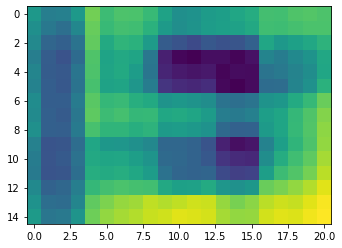

In [8]:
plt.imshow(x_train[8].reshape(15,21))
plt.show()

In [9]:
from sklearn.svm import SVC

model = SVC(C=1000, kernel='rbf', gamma=0.0001)
model.fit(x_train,y_train)

SVC(C=1000, gamma=0.0001)

In [10]:
prediksi = model.predict(x_validation)
accuracy = model.score(x_validation,y_validation)

In [11]:
print('Accuracy:', accuracy)

Accuracy: 1.0


In [12]:
print('Prediksi:', prediksi[8])

Prediksi: 8


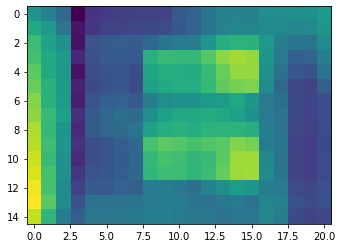

In [13]:
numb_pred = x_validation[8].reshape(15,21)
plt.imshow(numb_pred)
plt.show()

In [14]:
#confusion matrix
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_validation, prediksi)
conf_matrix

array([[ 5,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  6,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 11,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  4,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  3,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  6,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  9,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  7,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  3,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  6,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  4]], dtype=int64)

<AxesSubplot:>

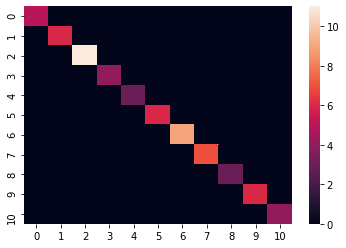

In [15]:
import seaborn as sns

sns.heatmap(conf_matrix)

In [16]:
from sklearn.metrics import classification_report
print("Classification report for - \n{}:\n{}\n".format(
    model, classification_report(y_validation, prediksi)))

Classification report for - 
SVC(C=1000, gamma=0.0001):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00        11
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         6
           6       1.00      1.00      1.00         9
           7       1.00      1.00      1.00         7
           8       1.00      1.00      1.00         3
           9       1.00      1.00      1.00         6
          10       1.00      1.00      1.00         4

    accuracy                           1.00        64
   macro avg       1.00      1.00      1.00        64
weighted avg       1.00      1.00      1.00        64




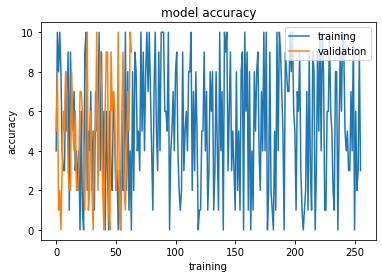

In [17]:
plt.plot(y_train)
plt.plot(y_validation)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('training')
plt.legend(['training', 'validation'], loc='upper right')
#plt.figure(figsize=(10,10))
plt.show()

In [18]:
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

result = pd.DataFrame({'Original': y_validation, 'Prediksi':prediksi})
result

,Original,Prediksi
0,5,5
1,8,8
2,1,1
3,2,2
4,0,0
5,3,3
6,6,6
7,5,5
8,8,8
9,7,7


In [19]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer

cv_dict = cross_validate(model, x_train, y_train, return_train_score=True)
cv_dict

{'fit_time': array([0.0199964 , 0.01599598, 0.01199555, 0.01199722, 0.01599622]),
 'score_time': array([0.        , 0.00400066, 0.00400019, 0.00399971, 0.        ]),
 'test_score': array([0.84615385, 0.84313725, 0.78431373, 0.80392157, 0.96078431]),
 'train_score': array([0.99019608, 0.96585366, 0.9804878 , 0.98536585, 0.9804878 ])}